In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


Original Lena Image (for Gaussian filtering notebook):


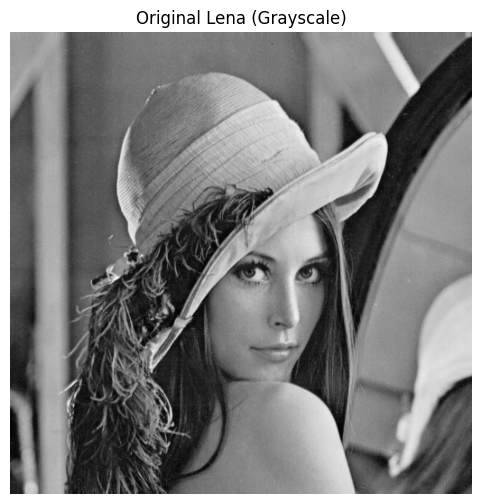

Image dimensions: 512x512


In [5]:
lena_path = 'lena512.bmp' 
original_image_gaussian_nb = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

if original_image_gaussian_nb is None:
    print(f"Error: Could not load image from {lena_path}")
    print("Please ensure 'lena512.bmp' is in the same directory as this notebook.")
else:
    print("Original Lena Image (for Gaussian filtering notebook):")
    display_image(original_image_gaussian_nb, title="Original Lena (Grayscale)", cmap='gray')
    img_height, img_width = original_image_gaussian_nb.shape
    print(f"Image dimensions: {img_width}x{img_height}")

In [6]:
def calculate_psnr(img1, img2):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')  
    
    max_pixel_value = 255.0
    psnr = 20 * math.log10(max_pixel_value / math.sqrt(mse))
    return psnr

print("calculate_psnr function defined.")

calculate_psnr function defined.


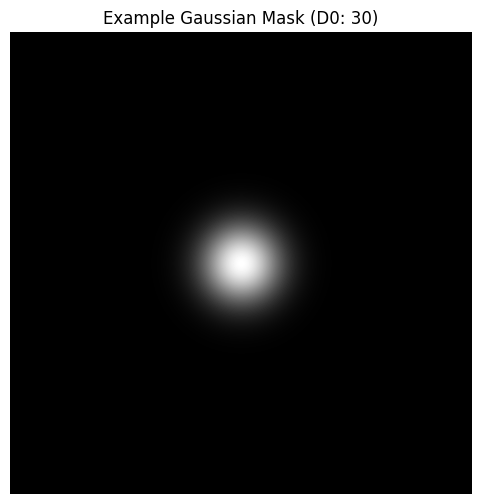

create_gaussian_mask function defined and example shown.


In [7]:
def create_gaussian_mask(h, w, center_x, center_y, D0):
    u = np.arange(w) - center_x
    v = np.arange(h) - center_y

    U, V = np.meshgrid(u, v)
    
    D_sq = U**2 + V**2
    
    mask = np.exp(-D_sq / (2 * (D0**2)))
    return mask

if 'original_image_gaussian_nb' in locals() and original_image_gaussian_nb is not None:
    rows, cols = original_image_gaussian_nb.shape
    center_x_display, center_y_display = cols // 2, rows // 2
    example_D0_display = 30 
    example_gaussian_mask_display = create_gaussian_mask(rows, cols, center_x_display, center_y_display, example_D0_display)
    display_image(example_gaussian_mask_display, title=f"Example Gaussian Mask (D0: {example_D0_display})", cmap='gray')
    print("create_gaussian_mask function defined and example shown.")


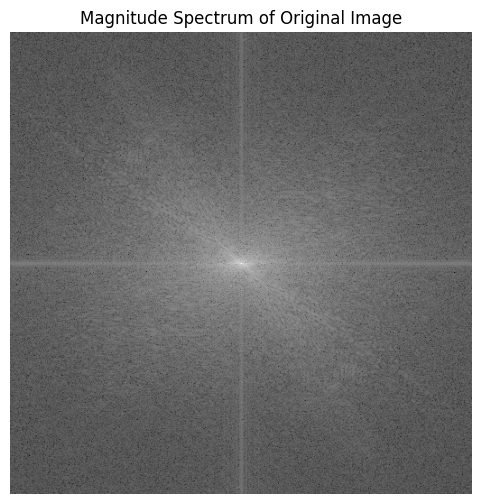


--- Processing with different Gaussian mask D0 values ---

Stage 1: Processing with Gaussian D0 = 20


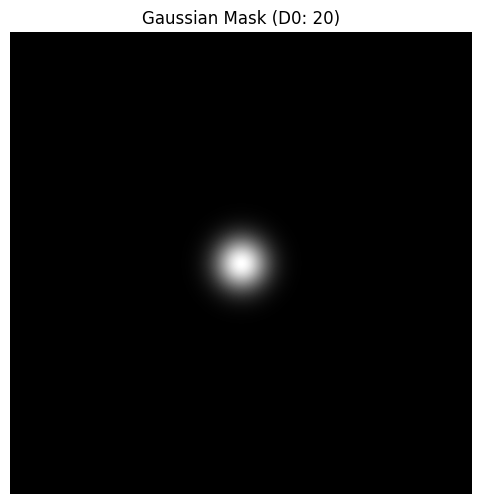

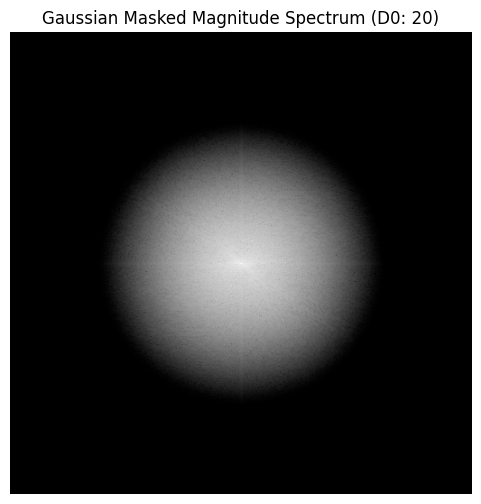

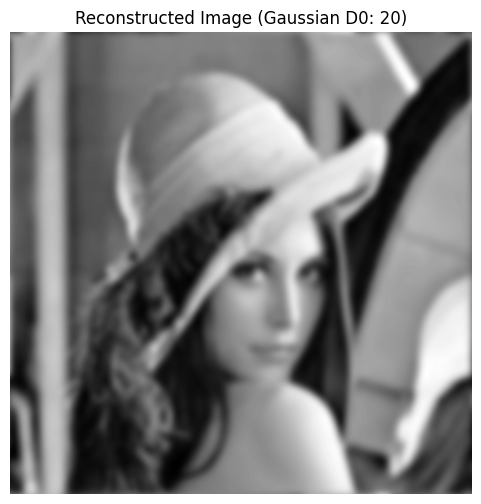

PSNR between original and reconstructed (Gaussian D0 20): 24.41 dB

Stage 2: Processing with Gaussian D0 = 60


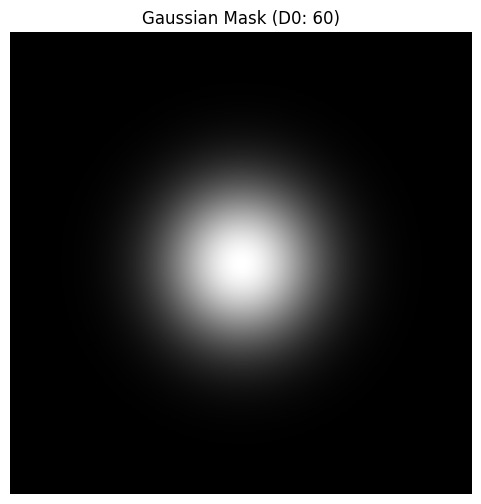

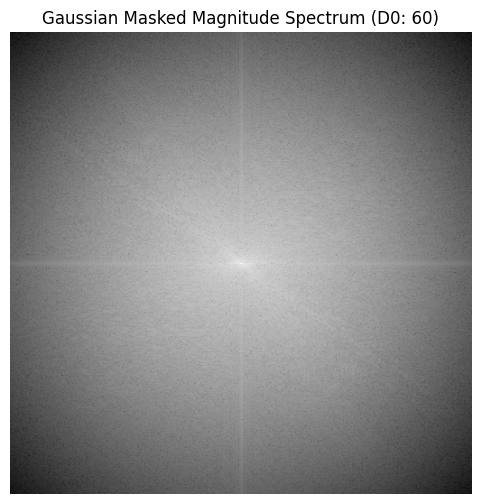

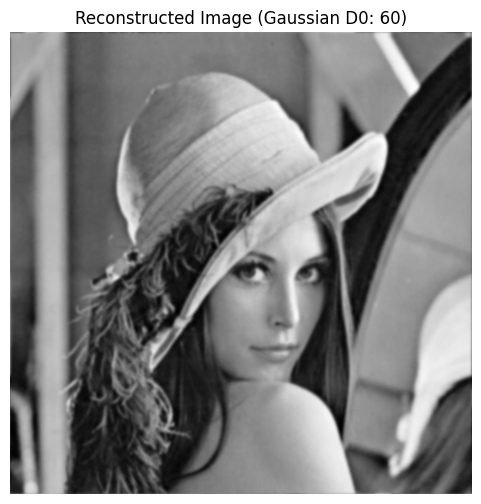

PSNR between original and reconstructed (Gaussian D0 60): 30.46 dB

Stage 3: Processing with Gaussian D0 = 120


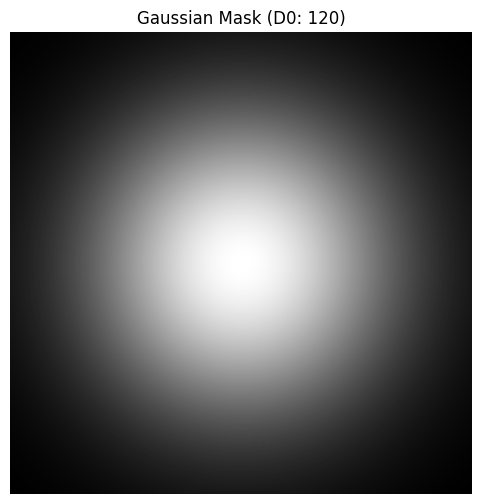

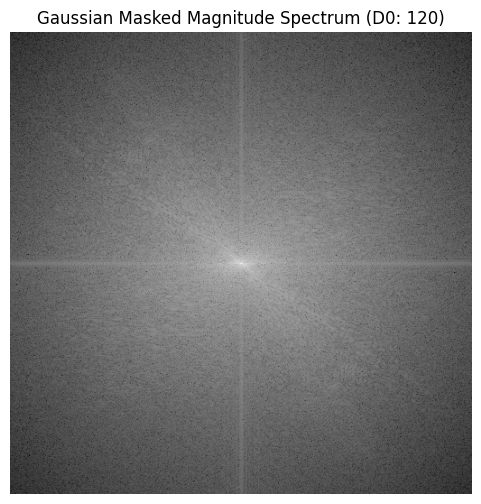

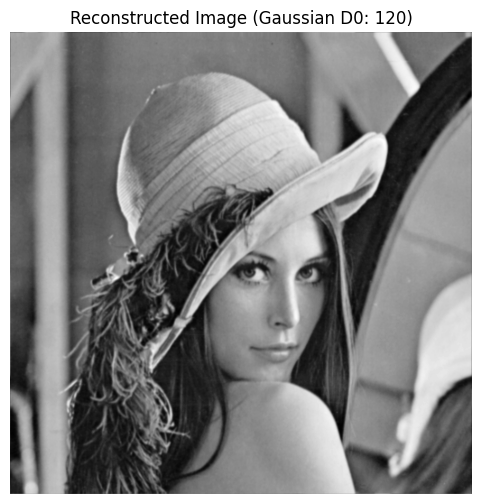

PSNR between original and reconstructed (Gaussian D0 120): 36.18 dB


In [8]:
if 'original_image_gaussian_nb' in locals() and original_image_gaussian_nb is not None:
    
    f_transform_gaussian_nb = np.fft.fft2(original_image_gaussian_nb)
    f_transform_shifted_gaussian_nb = np.fft.fftshift(f_transform_gaussian_nb) 
    
    magnitude_spectrum_original_gaussian_nb = 20 * np.log(np.abs(f_transform_shifted_gaussian_nb) + 1e-9)
    display_image(magnitude_spectrum_original_gaussian_nb, title="Magnitude Spectrum of Original Image", cmap='gray')

    D0_values_gaussian_nb = [20, 60, 120] 
    
    gaussian_results_notebook2 = []

    print("\n--- Processing with different Gaussian mask D0 values ---")
    for i, D0_val in enumerate(D0_values_gaussian_nb):
        print(f"\nStage {i+1}: Processing with Gaussian D0 = {D0_val}")

       
        rows, cols = original_image_gaussian_nb.shape
        center_x = cols // 2 
        center_y = rows // 2
        
        current_gaussian_mask = create_gaussian_mask(rows, cols, center_x, center_y, D0_val)
        display_image(current_gaussian_mask, title=f"Gaussian Mask (D0: {D0_val})", cmap='gray')

        f_transform_shifted_masked_gaussian = f_transform_shifted_gaussian_nb * current_gaussian_mask
        
        magnitude_spectrum_masked_gaussian = 20 * np.log(np.abs(f_transform_shifted_masked_gaussian) + 1e-9)
        display_image(magnitude_spectrum_masked_gaussian, title=f"Gaussian Masked Magnitude Spectrum (D0: {D0_val})", cmap='gray')

       
        f_ishift_gaussian = np.fft.ifftshift(f_transform_shifted_masked_gaussian)
        img_reconstructed_gaussian_nb = np.fft.ifft2(f_ishift_gaussian)
        img_reconstructed_gaussian_nb = np.abs(img_reconstructed_gaussian_nb) 
        

        img_reconstructed_display_gaussian_nb = np.clip(img_reconstructed_gaussian_nb, 0, 255).astype(np.uint8)

        display_image(img_reconstructed_display_gaussian_nb, title=f"Reconstructed Image (Gaussian D0: {D0_val})", cmap='gray')

        
        psnr_value_gaussian = calculate_psnr(original_image_gaussian_nb, img_reconstructed_display_gaussian_nb)
        print(f"PSNR between original and reconstructed (Gaussian D0 {D0_val}): {psnr_value_gaussian:.2f} dB")
        
        gaussian_results_notebook2.append({
            'D0': D0_val,
            'reconstructed_image': img_reconstructed_display_gaussian_nb,
            'psnr': psnr_value_gaussian,
            'mask': current_gaussian_mask,
            'masked_spectrum': magnitude_spectrum_masked_gaussian
        })